We are back to help Megaline try to upgrade users that have legacy plans to one of their newer plans! The Smart plan or the Ultra plan! Lets look at both plans and work through a couple of methods to allow us to see which plan would be the best for the customer!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv') 

display(df.head())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
missing_values = df.isnull().sum()

print(missing_values)

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [4]:
duplicate_values = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_values}")

Number of duplicate rows: 0


In [5]:
class_counts = df['is_ultra'].value_counts()

print("Counts of each class in 'is_ultra':")
print(class_counts)

print("\nPercentage distribution:")
print(class_counts / len(df) * 100)

Counts of each class in 'is_ultra':
0    2229
1     985
Name: is_ultra, dtype: int64

Percentage distribution:
0    69.352831
1    30.647169
Name: is_ultra, dtype: float64


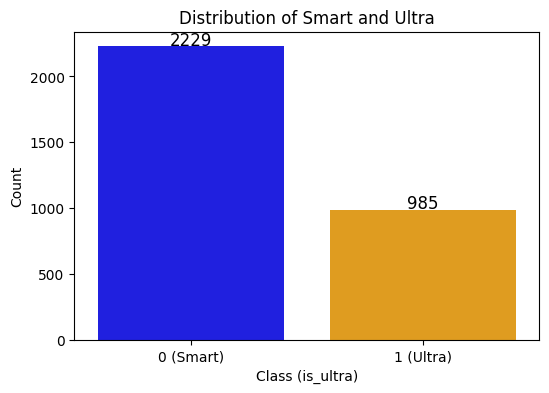

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['blue', 'orange'])

plt.xlabel("Class (is_ultra)")
plt.ylabel("Count")
plt.title("Distribution of Smart and Ultra")
plt.xticks([0, 1], labels=['0 (Smart)', '1 (Ultra)'])

for i, v in enumerate(class_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.show()

Alright! Now the good stuff! We have created our machine learning process and double checked them! Looking at the basic data we can see that there are more Smart plan users vs Ultra users. Let's dig a little more to see which plan is going to be most beneficial for these Legacy customers!

In [7]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=12345)  
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=12345)


print(f"Training set: {len(train_df)} rows")
print(f"Validation set: {len(valid_df)} rows")
print(f"Test set: {len(test_df)} rows")

Training set: 2249 rows
Validation set: 482 rows
Test set: 483 rows


In [8]:
x = df.drop('is_ultra', axis=1) 
y = df['is_ultra']  

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=12345)  
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=12345)  

max_depths = [3, 5, 10]
dt_accuracies = {}

for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    dt_model.fit(x_train, y_train)
    y_val_pred = dt_model.predict(x_val)
    dt_accuracies[depth] = accuracy_score(y_val, y_val_pred)

n_trees = [10, 50, 100]
rf_accuracies = {}

for n in n_trees:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(x_train, y_train)
    y_val_pred = rf_model.predict(x_val)
    rf_accuracies[n] = accuracy_score(y_val, y_val_pred)

logreg_model = LogisticRegression(random_state=12345)
logreg_model.fit(x_train, y_train)
y_val_pred_logreg = logreg_model.predict(x_val)
logreg_accuracy = accuracy_score(y_val, y_val_pred_logreg)

print("Decision Tree Accuracies (varying max_depth):")
for depth, acc in dt_accuracies.items():
    print(f"max_depth={depth}: {acc:.4f}")

print("\nRandom Forest Accuracies (varying n_estimators):")
for n, acc in rf_accuracies.items():
    print(f"n_estimators={n}: {acc:.4f}")

print(f"\nLogistic Regression Accuracy: {logreg_accuracy:.4f}")

best_rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
best_rf_model.fit(x_train, y_train)
y_test_pred_rf = best_rf_model.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\nRandom Forest (50 trees) Test Accuracy: {test_accuracy_rf:.4f}")

Decision Tree Accuracies (varying max_depth):
max_depth=3: 0.7854
max_depth=5: 0.7792
max_depth=10: 0.7745

Random Forest Accuracies (varying n_estimators):
n_estimators=10: 0.7652
n_estimators=50: 0.7838
n_estimators=100: 0.7838

Logistic Regression Accuracy: 0.7107

Random Forest (50 trees) Test Accuracy: 0.7900


We just did a lot of coding above! Don't worry we are about to break it down in simple terms. To find the most acurate way to help choose which plan will be best, I went through a few machine learning processes that will identify the best option to do so to help speed up the process along the way! as you can tell from above our Random Forest with 50 trees has given us a 79% accuracy rate! now lets continue looking at this data and see how we can use this to our advantage!

In [9]:
if 'is_ultra' not in df.columns:
    raise ValueError("Error: 'is_ultra' column is missing from the DataFrame.")

if df.isnull().sum().sum() > 0:
    print("Warning: The DataFrame contains missing values!")

x = df.drop('is_ultra', axis=1)
y = df['is_ultra']

if x.shape[1] == 0:
    raise ValueError("Error: No features found after dropping 'is_ultra'.")

if len(y.unique()) != 2:
    raise ValueError("Error: 'is_ultra' should be a binary classification target.")

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=12345)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=12345)

print(f"Train set size: {x_train.shape}, Validation set size: {x_val.shape}, Test set size: {x_test.shape}")

if len(y_train) != x_train.shape[0] or len(y_val) != x_val.shape[0] or len(y_test) != x_test.shape[0]:
    raise ValueError("Error: Mismatch between feature and target variable sizes after splitting.")

try:  
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=12345)
    dt_model.fit(x_train, y_train)
    y_val_pred = dt_model.predict(x_val)
    print(f"Decision Tree Accuracy (Depth=3): {accuracy_score(y_val, y_val_pred):.4f}")

    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(x_train, y_train)
    y_val_pred = rf_model.predict(x_val)
    print(f"Random Forest Accuracy (50 trees): {accuracy_score(y_val, y_val_pred):.4f}")

    logreg_model = LogisticRegression(random_state=12345, max_iter=500)
    logreg_model.fit(x_train, y_train)
    y_val_pred_logreg = logreg_model.predict(x_val)
    print(f"Logistic Regression Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.4f}")

except Exception as e:
    print(f"Error encountered during model training: {e}")

print("Sanity check completed.")

Train set size: (1928, 4), Validation set size: (643, 4), Test set size: (643, 4)
Decision Tree Accuracy (Depth=3): 0.7854
Random Forest Accuracy (50 trees): 0.7838
Logistic Regression Accuracy: 0.7107
Sanity check completed.


What I just did above is whats called a sanity check! what this means for Megaline is that up to this point we know that all the code is working the way it should! This also means that our 79% accuracy is solid and we can take that to the bank!

In [10]:
x = df.drop('is_ultra', axis=1) 
y = df['is_ultra'] 

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=12345)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=12345)

best_rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
best_rf_model.fit(x_train, y_train)

y_val_pred = best_rf_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = best_rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Validation Accuracy: {val_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")

feature_importance = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

Random Forest Validation Accuracy: 0.7838
Random Forest Test Accuracy: 0.7900

Feature Importance:
    Feature  Importance
3   mb_used    0.343437
1   minutes    0.235189
2  messages    0.210697
0     calls    0.210677


There you have it! The most important features from our data, with a 79% accuracy rate! Using the information that we have sifted through the best plan we use to get our customers to switch from thier legacy plans will be the plan that matches closest to the feature importance! 